# Install and Load Packages

In [2]:
# !pip install flaml

In [3]:
# !pip install lime

In [4]:
import lime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from flaml import AutoML

In [5]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/hr_analytics_turnover_dataset/HR_comma_sep.csv")

# Data Inspection

In [6]:
raw_data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
raw_data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [9]:
for column in raw_data.columns:
  print(f"{column}:", raw_data[column].unique())

satisfaction_level: [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
last_evaluation: [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
number_project: [2 5 7 6 4 3]
average_montly_hours: [157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294 134

# Data Preprocessing

In [10]:
raw_data.rename(columns={"sales": "roles"}, inplace=True)

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   roles                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [12]:
X_data = raw_data.drop('left', axis=1).copy()
y_data = raw_data['left'].copy()

In [13]:
X_data['salary'] = X_data['salary'].replace({"low": 1, "medium": 2, "high": 3})

/var/folders/8m/3p682pp13l36tzbh7_bgx2100000gn/T/ipykernel_80949/2785502729.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_data['salary'] = X_data['salary'].replace({"low": 1, "medium": 2, "high": 3})


In [14]:
X_data = pd.get_dummies(X_data, dtype=float).drop(columns="roles_IT")

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
  X_data,
  y_data,
  test_size=0.3,
  random_state=65555,
  stratify=y_data
)

# Data Exploration

In [17]:
# X_data['left'] = y_train.copy()

In [18]:
# X_data['left'].value_counts()

# Modeling

## Define Model

In [19]:
automl = AutoML()
settings = {
    "time_budget": 60,  # total running time in seconds
    "metric": "accuracy",  # primary metrics for regression can be chosen from: ['mae','mse','r2']
    "estimator_list": [
        "xgboost"
    ],  # list of ML learners; we tune XGBoost in this example
    "task": "classification",  # task type
    "log_file_name": "houses_experiment.log",  # flaml log file
    "seed": 7654321,  # random seed
}
automl.fit(X_train=X_train, y_train=y_train, **settings)

# automl.fit(X_train, y_train, task="classification", )

[flaml.automl.logger: 04-05 01:35:43] {1680} INFO - task = classification
[flaml.automl.logger: 04-05 01:35:43] {1691} INFO - Evaluation method: holdout
[flaml.automl.logger: 04-05 01:35:43] {1789} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 04-05 01:35:43] {1901} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl.logger: 04-05 01:35:43] {2219} INFO - iteration 0, current learner xgboost
[flaml.automl.logger: 04-05 01:35:43] {2345} INFO - Estimated sufficient time budget=293s. Estimated necessary time budget=0s.
[flaml.automl.logger: 04-05 01:35:43] {2392} INFO -  at 0.1s,	estimator xgboost's best error=0.2386,	best estimator xgboost's best error=0.2386
[flaml.automl.logger: 04-05 01:35:43] {2219} INFO - iteration 1, current learner xgboost
[flaml.automl.logger: 04-05 01:35:43] {2392} INFO -  at 0.1s,	estimator xgboost's best error=0.2386,	best estimator xgboost's best error=0.2386
[flaml.automl.logger: 04-05 01:35:43] {2219} INFO - iteration 2, cu

In [20]:
automl.best_estimator

'xgboost'

In [21]:
automl.model.estimator

XGBClassifier(base_score=None, booster=None, callbacks=[],
              colsample_bylevel=0.5210664820067598, colsample_bynode=None,
              colsample_bytree=0.8326041578837515, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy='lossguide', importance_type=None,
              interaction_constraints=None, learning_rate=0.6064978559327864,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=0, max_leaves=211,
              min_child_weight=0.0888416394086547, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=18,
              n_jobs=-1, num_parallel_tree=None, random_state=None, ...)

<BarContainer object of 17 artists>

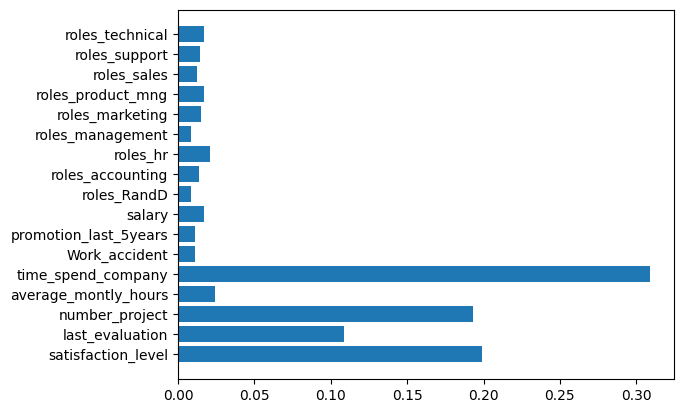

In [22]:
import matplotlib.pyplot as plt

plt.barh(automl.feature_names_in_, automl.feature_importances_)

In [23]:
y_pred = automl.predict_proba(X_train)

In [24]:
y_pred

array([[9.9942148e-01, 5.7852472e-04],
       [2.1207333e-03, 9.9787927e-01],
       [9.9984801e-01, 1.5201201e-04],
       ...,
       [9.7779787e-01, 2.2202114e-02],
       [9.9904227e-01, 9.5770403e-04],
       [9.9985534e-01, 1.4465630e-04]], dtype=float32)

In [25]:
y_pred

array([[9.9942148e-01, 5.7852472e-04],
       [2.1207333e-03, 9.9787927e-01],
       [9.9984801e-01, 1.5201201e-04],
       ...,
       [9.7779787e-01, 2.2202114e-02],
       [9.9904227e-01, 9.5770403e-04],
       [9.9985534e-01, 1.4465630e-04]], dtype=float32)

In [26]:
from flaml.automl.ml import sklearn_metric_loss_score

In [27]:
from lime import lime_tabular

In [28]:
X_train.loc[1,:]

satisfaction_level         0.80
last_evaluation            0.86
number_project             5.00
average_montly_hours     262.00
time_spend_company         6.00
Work_accident              0.00
promotion_last_5years      0.00
salary                     2.00
roles_RandD                0.00
roles_accounting           0.00
roles_hr                   0.00
roles_management           0.00
roles_marketing            0.00
roles_product_mng          0.00
roles_sales                1.00
roles_support              0.00
roles_technical            0.00
Name: 1, dtype: float64

In [29]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(X_train,
                      feature_names=X_train.columns,
                      class_names=['stay', 'left'],
                      discretize_continuous=False,
                      verbose=True)

In [30]:
user_id_1 = X_train.iloc[1]

In [31]:
lime_res = explainer.explain_instance(user_id_1, automl.predict_proba, num_features=len(X_train.columns))

Intercept 0.03966242624928315
Prediction_local [0.03388112]
Right: 0.99787927


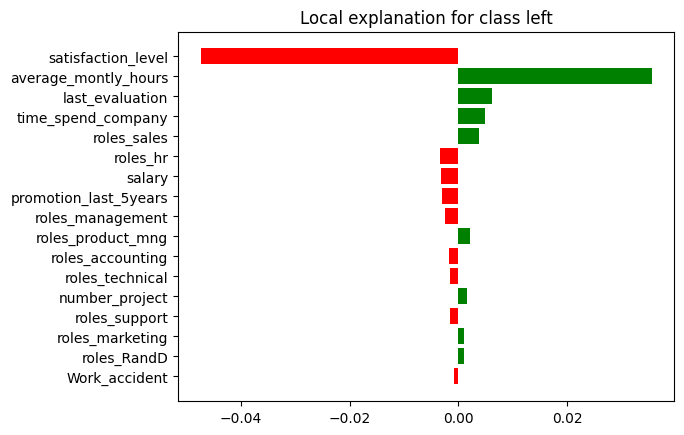

In [32]:
lime_res.as_pyplot_figure();

In [33]:
lime_res.show_in_notebook(show_table=True, show_all=True)

In [34]:
lime_res.as_list()

[('satisfaction_level', -0.047379411147259035),
 ('average_montly_hours', 0.03552324913767401),
 ('last_evaluation', 0.006114148508735551),
 ('time_spend_company', 0.004848226327314694),
 ('roles_sales', 0.0037604610042036835),
 ('roles_hr', -0.003378530603008509),
 ('salary', -0.003161843918446249),
 ('promotion_last_5years', -0.0030093554155614815),
 ('roles_management', -0.0025003673235702586),
 ('roles_product_mng', 0.002185821544424093),
 ('roles_accounting', -0.0016521773684327504),
 ('roles_technical', -0.0016168585772014452),
 ('number_project', 0.0015916946196413149),
 ('roles_support', -0.00153374095025741),
 ('roles_marketing', 0.0010454562878820077),
 ('roles_RandD', 0.0009804297656538794),
 ('Work_accident', -0.000721277811929021)]

In [35]:
iseng = pd.DataFrame(lime_res.as_list()).rename(columns={0: "variable", 1: "value"})

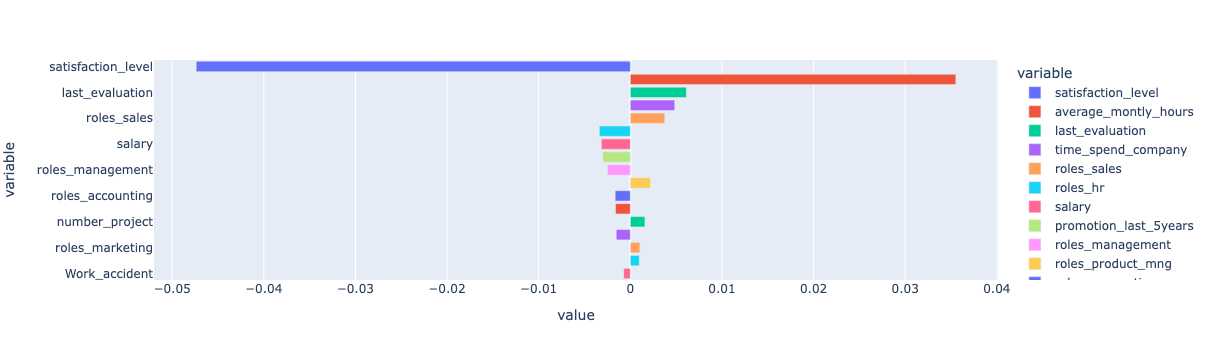

In [36]:
fig = px.bar(
        iseng,
        y="variable",
        x="value",
        color="variable", orientation="h")

fig.show()

In [37]:
import pickle
with open('automl.pkl', 'wb') as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

In [82]:
explainer

In [38]:
automl.predict_proba(
          pd.DataFrame(
      [user_id_1.values.tolist()],
      columns=user_id_1.index.tolist()
    )
)

array([[0.00726569, 0.9927343 ]], dtype=float32)

In [39]:
y_train.iloc[1]

1

In [40]:
colname_list = X_train.columns.to_list()
container = []
for i in range(len(colname_list)):
  container.append((i, colname_list[i]))

container = dict(container)

explainer_table = pd.DataFrame(lime_res.local_exp[1]).replace(container).rename(columns={0: "variable", 1: "value"}).copy()

In [41]:
explainer_table

variable     value
0      satisfaction_level -0.043170
1    average_montly_hours  0.027885
2      time_spend_company  0.014083
3         last_evaluation  0.008947
4          number_project -0.004481
5             roles_RandD -0.004312
6                roles_hr -0.004029
7             roles_sales  0.002918
8        roles_management  0.001900
9                  salary -0.001476
10          Work_accident  0.001409
11       roles_accounting -0.001405
12        roles_marketing -0.001164
13          roles_support  0.001077
14  promotion_last_5years -0.000965
15      roles_product_mng -0.000964
16        roles_technical -0.000688

In [68]:
fig = px.bar(
        lime_res.as_list(),
        y="variable",
        x="value",
        color="variable", orientation="h")

fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of [0, 1] but received: value

In [ ]:
user_id_2 = X_train.iloc[2]

In [ ]:
pred_result = automl.predict_proba(X_train.iloc[[2]])[0]
pred_result

In [ ]:
def raw_pred_to_class_pred(data):
  employee_att_stat = ["stay", "left"]
  pred_result = automl.predict_proba(data)[0]
  return dict(zip(employee_att_stat, pred_result))

In [ ]:
raw_pred_to_class_pred(X_train.iloc[[2]])

In [ ]:
def lime_visualizer(data, model):
  lime_res = explainer.explain_instance(data, model.predict_proba)
  explainer_table = pd.DataFrame(lime_res.as_list()).rename(columns={0: "variable", 1: "value"})
  fig = px.bar(
        explainer_table,
        y="variable",
        x="value",
        color="variable", orientation="h")
  return fig

In [ ]:
result = lime_visualizer(X_train.iloc[2], automl)

In [ ]:
result